In [36]:

import numpy as np
from qiskit import QuantumRegister, ClassicalRegister
np.set_printoptions(suppress = True)
from importlib import reload
import functions
from functions import *
import arithmetic
from arithmetic import *
functions = reload(functions)
arithmetic = reload(arithmetic)
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


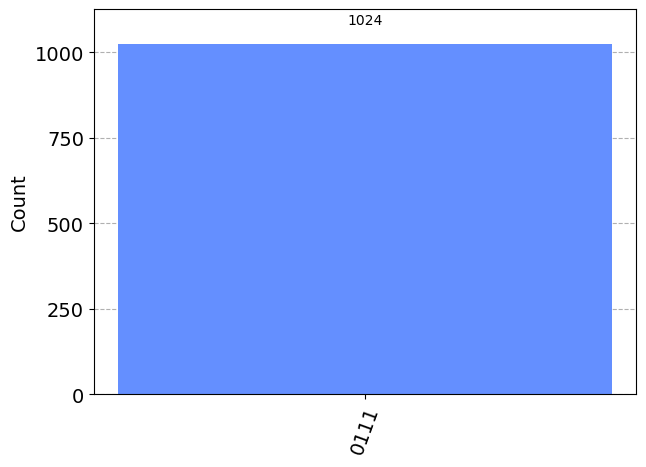

operation count: 19
operations: {'u3': 5, 'barrier': 5, 'measure': 4, 'mcphase': 3, '2-bitQFT': 1, '2-bitQFT^(-1)': 1}


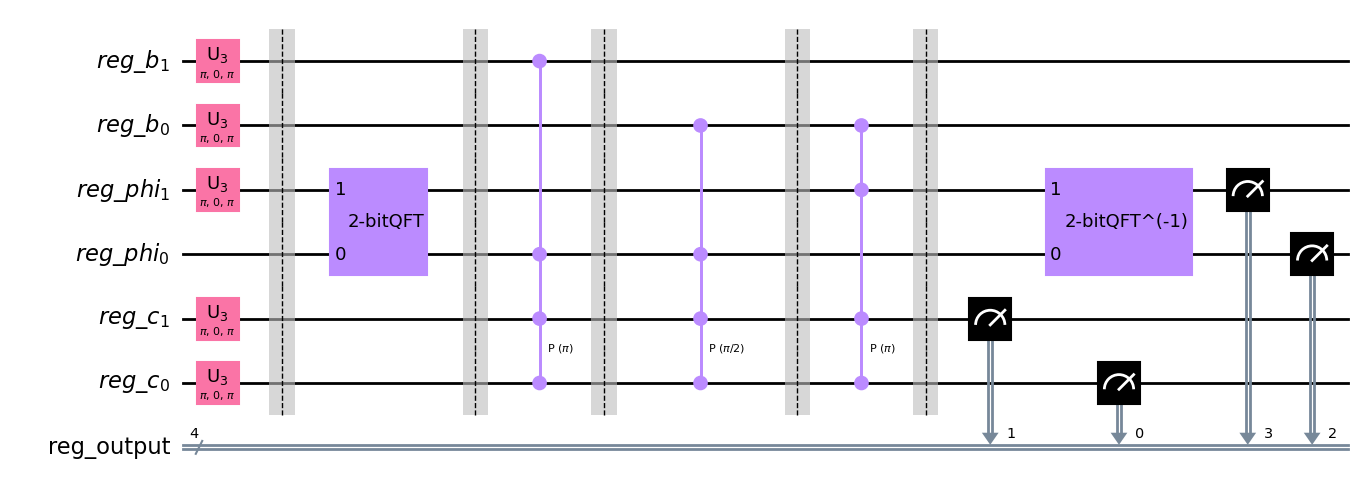

In [37]:
# fourier space addition
reverse_bool  =False
n = 2
control_width = 2
no_qubits = 2 * n + control_width

delta = 4

reg_control = QuantumRegister(2, name="reg_c")
reg_b = QuantumRegister(n, name="reg_b")
reg_phi = QuantumRegister(n, name="reg_phi")
cr = ClassicalRegister(no_qubits, name="reg_output")

qc = QuantumCircuit(reg_control, reg_phi, reg_b, cr)

qc.x(reg_b[i] for i in [0, 1])
qc.x(reg_phi[i] for i in [1])
qc.x(reg_control[i] for i in range(control_width))

qc.barrier()

qc.append(nbitCtrlAdditionTransform(n, reg_control, reg_b, reg_phi, delta), reg_control[0:control_width] + reg_b[0:n] + reg_phi[0:n])

qc.measure(range(no_qubits), range(no_qubits))

simulator = Aer.get_backend('qasm_simulator')
job_sim = simulator.run(qk.transpile(qc, simulator), shots=2**10)
result_sim = job_sim.result()
counts = result_sim.get_counts(qc)


# plotShor(no_qubits, len_exp, counts, g, N)
hist = plot_histogram(counts)
display(hist)

decomposed = qc.decompose(reps=1)

print("operation count: {}".format(sum(dict(decomposed.count_ops()).values())))
print("operations: {}".format(dict(decomposed.count_ops())))

decomposed.draw(reverse_bits=True, output="mpl", style="bw", fold=-1, justify='right', filename="circuits/{}-bitFourierSpaceAdder.png".format(n, "Reversed" if reverse_bool == True else ""))

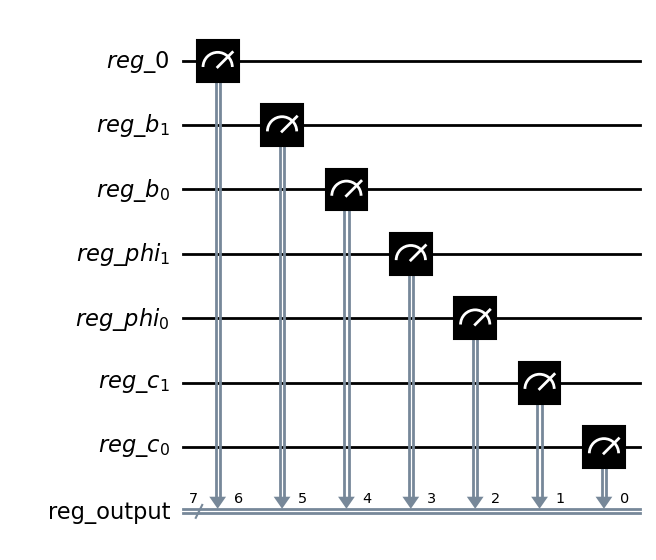

In [9]:
# fourier space modular addition
reverse_bool  =False
n = 2
no_qubits = 2 * n + 3

delta = 4

reg_control = QuantumRegister(2, name="reg_c")
reg_b = QuantumRegister(n, name="reg_b")
reg_phi = QuantumRegister(n, name="reg_phi")
reg_0 = QuantumRegister(1, name="reg_0")
cr = ClassicalRegister(no_qubits, name="reg_output")

qc = QuantumCircuit(reg_control, reg_phi, reg_b, reg_0, cr)
qc.measure(range(no_qubits), range(no_qubits))

decomposed = qc.decompose(reps=3)
decomposed.draw(reverse_bits=True, output="mpl", style="bw", fold=-1, justify='right', filename="circuits/{}-bitFourierSpaceModAdder.png".format(n, "Reversed" if reverse_bool == True else ""))